<a href="https://colab.research.google.com/github/tishitagoel/RBC/blob/main/RBC_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K

In [107]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [108]:
img_width = 150
img_height = 150

train_data_dir = '/content/drive/MyDrive/RBC/augmented/train'
validation_data_dir = '/content/drive/MyDrive/RBC/augmented/validation'
train_samples = 500
validation_samples = 15
epochs = 90
batch_size = 16


input_shape = (img_width, img_height, 3)

In [109]:
SIZE = 150

INPUT_SHAPE = (SIZE, SIZE, 3)

model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [110]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#print(model.summary())   

In [111]:
batch_size = 16


train_datagen = ImageDataGenerator(
        rescale=1./255,
       # rotation_range=45,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [112]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [113]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 64x64
        batch_size=batch_size,
        class_mode='binary') 

Found 571 images belonging to 2 classes.


In [114]:
print(train_generator.class_indices)


{'macrocyte': 0, 'normal': 1}


In [115]:
imgs, labels = next(train_generator)

In [116]:
input_shape = (150,150,3)

In [117]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

16
0.0


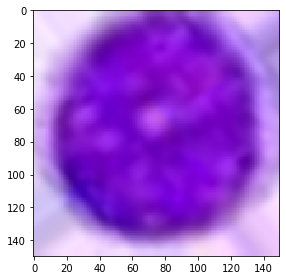

0.0


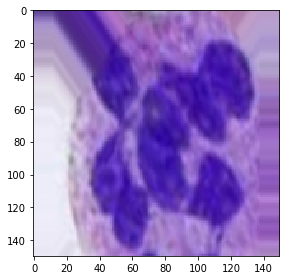

0.0


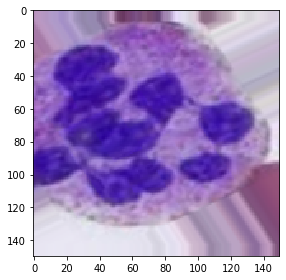

0.0


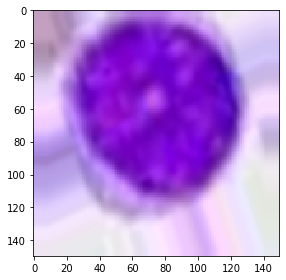

1.0


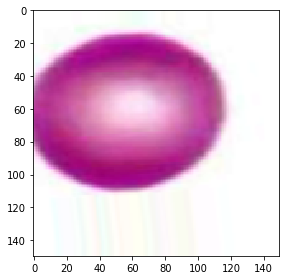

1.0


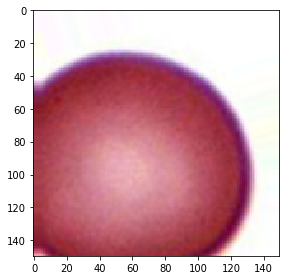

0.0


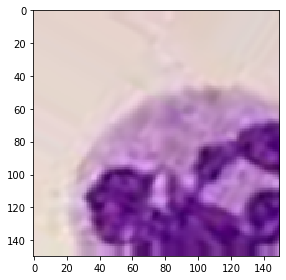

0.0


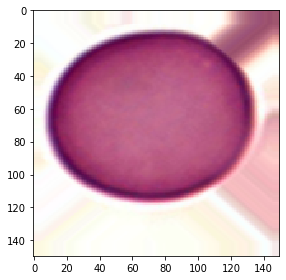

0.0


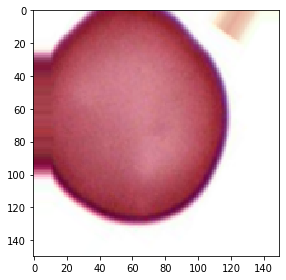

1.0


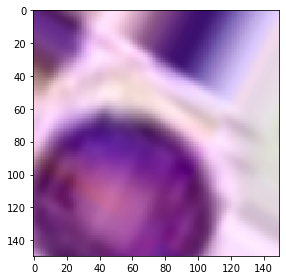

1.0


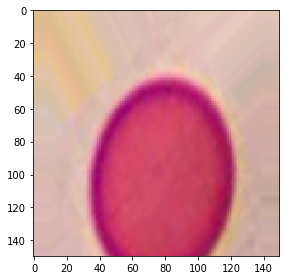

0.0


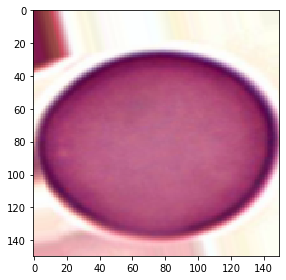

0.0


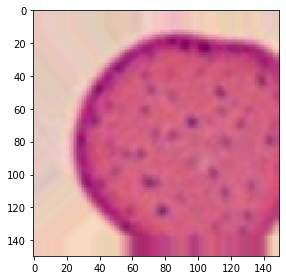

1.0


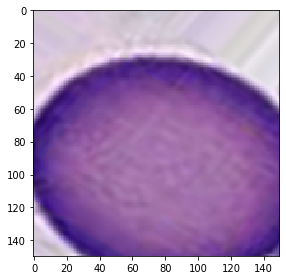

0.0


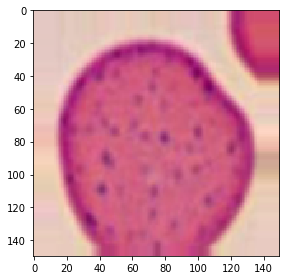

1.0


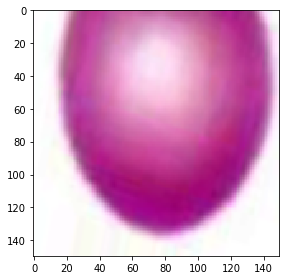

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [119]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20 images belonging to 2 classes.


In [123]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=500 // batch_size,
    epochs= 50,
    validation_data=validation_generator,
    validation_steps=40 // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
31/31 [==============================] - 15s 487ms/step - loss: 0.2940 - accuracy: 0.8819 - val_loss: 1.0358 - val_accuracy: 0.6000
Epoch 2/50
31/31 [==============================] - 15s 479ms/step - loss: 0.2316 - accuracy: 0.8880 - val_loss: 0.2360 - val_accuracy: 0.8500
Epoch 3/50
31/31 [==============================] - 15s 480ms/step - loss: 0.2354 - accuracy: 0.9063 - val_loss: 0.2561 - val_accuracy: 0.9000
Epoch 4/50
31/31 [==============================] - 15s 485ms/step - loss: 0.2367 - accuracy: 0.9002 - val_loss: 0.2096 - val_accuracy: 0.9000
Epoch 5/50
31/31 [==============================] - 15s 483ms/step - loss: 0.2210 - accuracy: 0.9002 - val_loss: 0.2365 - val_accuracy: 0.8500
Epoch 6/50
31/31 [==============================] - 15s 481ms/step - loss: 0.2225 - accuracy: 0.9084 - val_loss: 0.1910 - val_accuracy: 0.9000
Epoch 7/50
31/31 [==============================] - 15s 480ms/step - loss: 0.1981 - accuracy: 0.9185 - val_loss: 0.1959 - val_accuracy: 0.9000

In [124]:
y = model.save_weights('RBC_one.h5')
x = history.history['accuracy']
best_accuracy = max(x)
best_accuracy

0.9857434034347534